In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the dataset
df = pd.read_csv('spam_email1.csv')  # Assuming 'spam_emails.csv' has columns 'label' and 'text'

In [4]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    tokens = text.split()
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [5]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [6]:
# Feature Extraction
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})  # Mapping labels to binary


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Model Training (Using Naive Bayes Classifier)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.9497584541062802
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       742
           1       0.88      0.95      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



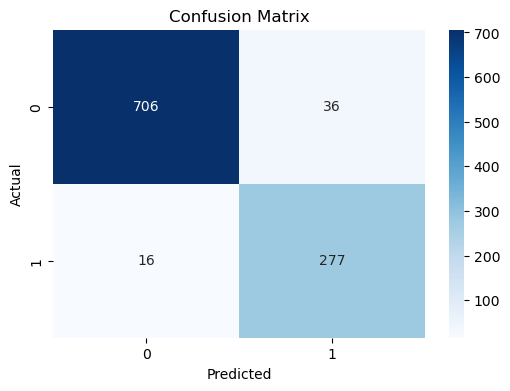

In [12]:


# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:

# Spam Check Function
def check_spam(email_text):
    processed_email = preprocess_text(email_text)
    vectorized_email = vectorizer.transform([processed_email]).toarray()
    prediction = model.predict(vectorized_email)[0]
    return "Spam" if prediction == 1 else "Not Spam"



In [41]:
# Example Usage
email_example = "Congratulations! You've won a $1000 gift card. Click here to claim."
print("Email Classification:", check_spam(email_example))

Email Classification: Spam


In [40]:
# Example Usage
email_example = "This letter from Hr ."
print("Email Classification:", check_spam(email_example))

Email Classification: Not Spam
